In [44]:
#Importing in Pandas and other things
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#Loading in Education - Income
inc = pd.read_csv("education-income.csv", index_col="Neighborhood")
inc.dropna()

,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
Neighborhood,,,,,,,,,,,,,,,
Allegheny Center,3,933,609,18.7%,44.5%,17.2%,15.8%,3.8%,"$16,964","$20,911","$22,535","$22,793",954,324,34.0%
Allegheny West,3,462,239,9.2%,28.9%,6.7%,44.8%,10.5%,"$26,638","$41,761","$35,386","$45,519",239,12,5.0%
Allentown,6,"2,500","1,729",23.0%,63.3%,6.6%,5.6%,1.5%,"$22,539","$29,274","$29,941","$31,909","2,212",630,28.5%
Arlington,7,"1,869","1,232",14.9%,65.3%,10.1%,7.1%,2.5%,"$27,167","$25,119","$36,089","$27,380","1,779",361,20.3%
Arlington Heights,7,244,166,18.1%,74.1%,0.0%,7.8%,0.0%,"$18,646","$9,417","$24,769","$10,265",293,169,57.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,"2,669","1,875",16.2%,65.7%,7.0%,9.4%,1.7%,"$24,883","$31,779","$33,055","$34,639","2,814",722,25.7%
West End,4,254,86,12.8%,36.0%,24.4%,26.7%,0.0%,"$21,382","$41,250","$28,404","$44,963",116,0,0.0%
West Oakland,14,"2,604","1,036",12.0%,46.7%,4.1%,20.1%,17.2%,"$23,517","$20,962","$31,240","$22,849","1,626",758,46.6%


<AxesSubplot: xlabel='Neighborhood'>

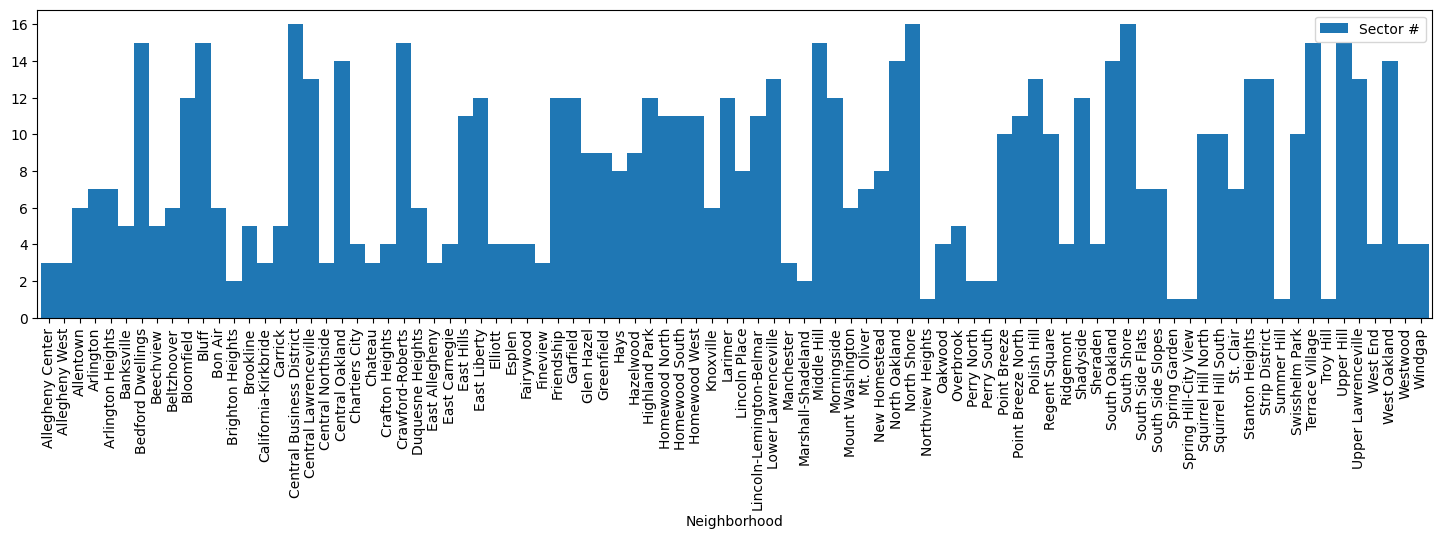

In [45]:
#Just Checking the Raw data
inc.plot(kind="bar", width=1, figsize=(18, 4))

In [46]:
#Dropping unnessisary columns
newpov = inc.drop(poverty.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]], axis=1)
#Checking if everything is correct
newpov.head(5)

NameError: name 'poverty' is not defined

In [ ]:
#Cleaning the Data, Some columns had 0% and 100% for poverty, which seems inaccurate
newpov = newpov.drop(['Chateau'])
newpov = newpov.drop(['North Shore'])
newpov = newpov.drop(['South Shore'])
newpov = newpov.drop(['West End'])
#Opening the data again
newpov.head(5)

,Est. Percent Under Poverty (2010)
Neighborhood,
Allegheny Center,34.0%
Allegheny West,5.0%
Allentown,28.5%
Arlington,20.3%
Arlington Heights,57.7%


In [ ]:
#Converting the Est Percent Under Poverty (2010) to floats instead of strings
count = 0
#Instance Variable for a loop that goes through all values of newpov
while count < len(newpov):
    #Casting the strings inside newpov as a float by chopping off the % value from the end
    newpov['Est. Percent Under Poverty (2010)'][count] = float(newpov['Est. Percent Under Poverty (2010)'][count][:3])
    count = count + 1
#Openning the data up to check work
newpov.head(5)

,Est. Percent Under Poverty (2010)
Neighborhood,
Allegheny Center,34.0
Allegheny West,5.0
Allentown,28.0
Arlington,20.0
Arlington Heights,57.0


In [ ]:
#Now that the data is numerical, we can now order it
newpov = newpov.sort_values(by=["Est. Percent Under Poverty (2010)"], ascending=True)
newpov.head(5)

,Est. Percent Under Poverty (2010)
Neighborhood,
Regent Square,1.1
Swisshelm Park,2.1
Strip District,2.1
Lincoln Place,3.6
Stanton Heights,4.2


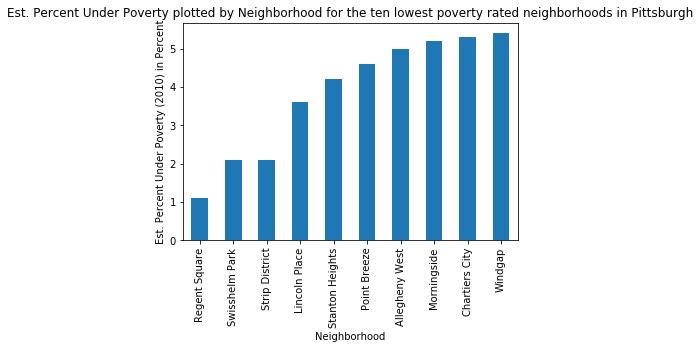

In [ ]:
#Finally we are able to plot the data, only plotting the first ten to be readable.
newpov['Est. Percent Under Poverty (2010)'][:10].plot(kind="bar", ylabel="Est. Percent Under Poverty (2010) in Percent", title="Est. Percent Under Poverty plotted by Neighborhood for the ten lowest poverty rated neighborhoods in Pittsburgh")

In [ ]:
#Dropping the head so it is easier to read
newpov.head(10)

,Est. Percent Under Poverty (2010)
Neighborhood,
Regent Square,1.1
Swisshelm Park,2.1
Strip District,2.1
Lincoln Place,3.6
Stanton Heights,4.2
Point Breeze,4.6
Allegheny West,5.0
Morningside,5.2
Chartiers City,5.3


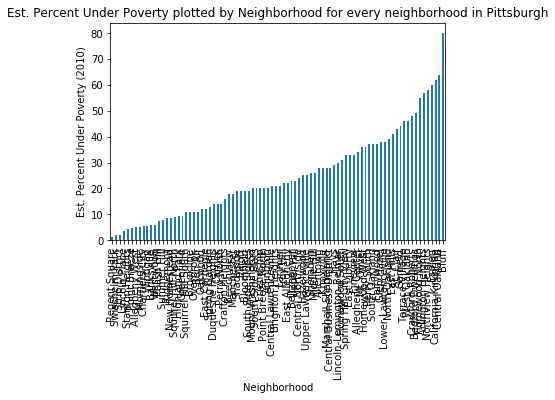

In [ ]:
#Just to get an overall picture of the city, here is the plot with all the values
newpov['Est. Percent Under Poverty (2010)'].plot(kind="bar", ylabel="Est. Percent Under Poverty (2010)",title="Est. Percent Under Poverty plotted by Neighborhood for every neighborhood in Pittsburgh")

# Conclusion 
## How I manipulated the data
* This was a difficult process to get to a readable state, but insodoing I learnt a lot more about pandas and how they work. I firstly starting off by importing the whole dataset into a variable inc. After verifying that nothing was wrong with the data, I then made a new variable newpov, which contained only the Est. Percent Under Poverty for each neighborhood, so I only had what I wanted. I then went and cleaned the data for any outliers, as there were a few with 100% or 0% poverty as a result of N/A values. After that, I had to change the data I was working with from Strings to floats, as the raw data contained a percent sign, which messed everything up. I did this with a simple while loop, casting and substrings. After that, it was just a simple sort command and graphing. I chose to graph both the lowest ten neighborhoods, then also all the neighborhoods, just to get a sense of inequality in the city. I was amazed by the difference, as Regent Square has only 1.1% under the poverty line, while Bluff has around 80%. I also included the table for the lowest ten, for ease of reading.
## Scoring 
* Scoring is quite simple. I will be assigning placement based on the lowest poverty percent. This will then be totalled with the rest of my group, and the highest score will be the best neighborhood. The point allocation goes as follows.
1. Ten Points
2. Seven Points
3. Three Points\
4-10 all get one point
## Point Allocation
Regent Square: 10 Points \
Swisshelm Park: 7 Points \
Stript District: 7 Points \
Lincoln Place: 3 Points \
Staton Heights: 1 Point \
Point Breeze: 1 Point\
Allegheny West: 1 Point\
Morningside: 1 Point \
Chartiers City: 1 Point \
Windgap: 1 Point 